In [9]:
# Import necessary libraries
import pandas as pd

# Define the file path
file_path = "DataAnalyst_Assesment_Dataset.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="Large_Fake_Bookings_With_Discre")

# Display first few rows of the dataset
df.head()


,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [11]:
# Step 1: Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values for each column
missing_values[missing_values > 0]

Class Type            672
Instructor            730
Time Slot             205
Duration (mins)       205
Facility              328
Theme                 727
Subscription Type    1000
Customer Email         94
Customer Phone        105
dtype: int64

In [13]:
# Step 2: Handling Missing Values
# Check if 'Subscription Type' exists before dropping
if 'Subscription Type' in df.columns:
    df.drop(columns=['Subscription Type'], inplace=True)

# Fill missing values with "Not Applicable" where relevant
df['Class Type'] = df['Class Type'].fillna("Not Applicable")
df['Instructor'] = df['Instructor'].fillna("Not Applicable")
df['Theme'] = df['Theme'].fillna("Not Applicable")

# Fill missing 'Facility' with "Not Applicable" (likely missing for non-facility bookings)
df['Facility'] = df['Facility'].fillna("Not Applicable")

# Fill missing 'Time Slot' and 'Duration (mins)' with "Unknown" and 0 respectively
df['Time Slot'] = df['Time Slot'].fillna("Unknown")
df['Duration (mins)'] = df['Duration (mins)'].fillna(0)

# Fill missing Customer Contact details with "Unknown"
df['Customer Email'] = df['Customer Email'].fillna("Unknown")
df['Customer Phone'] = df['Customer Phone'].fillna("Unknown")

# Verify missing values are handled
df.isnull().sum()

Booking ID         0
Customer ID        0
Customer Name      0
Booking Type       0
Booking Date       0
Status             0
Class Type         0
Instructor         0
Time Slot          0
Duration (mins)    0
Price              0
Facility           0
Theme              0
Service Name       0
Service Type       0
Customer Email     0
Customer Phone     0
dtype: int64

In [15]:
# Step 3: Check for duplicate records

# Count the number of duplicate rows (excluding the index)
duplicate_count = df.duplicated().sum()

# Display the count of duplicate records
duplicate_count

0

In [17]:
# Step 4: Check Data Types and Convert if Necessary

# Display current data types
df.dtypes

Booking ID                 object
Customer ID                object
Customer Name              object
Booking Type               object
Booking Date       datetime64[ns]
Status                     object
Class Type                 object
Instructor                 object
Time Slot                  object
Duration (mins)           float64
Price                     float64
Facility                   object
Theme                      object
Service Name               object
Service Type               object
Customer Email             object
Customer Phone             object
dtype: object

In [19]:
from datetime import datetime

# Step 5: Convert 'Time Slot' to proper time format

# Convert time slot where values are valid, otherwise keep as 'Unknown'
def convert_time(value):
    try:
        return datetime.strptime(value, "%H:%M:%S").time()  # Convert to time format
    except (ValueError, TypeError):
        return "Unknown"  # Keep unknown values as is

df['Time Slot'] = df['Time Slot'].apply(convert_time)

# Step 6: Standardize 'Customer Phone' format

# Remove any spaces, dashes, or special characters
df['Customer Phone'] = df['Customer Phone'].str.replace(r'\D', '', regex=True)

# Display updated data types to confirm changes
df.dtypes

Booking ID                 object
Customer ID                object
Customer Name              object
Booking Type               object
Booking Date       datetime64[ns]
Status                     object
Class Type                 object
Instructor                 object
Time Slot                  object
Duration (mins)           float64
Price                     float64
Facility                   object
Theme                      object
Service Name               object
Service Type               object
Customer Email             object
Customer Phone             object
dtype: object

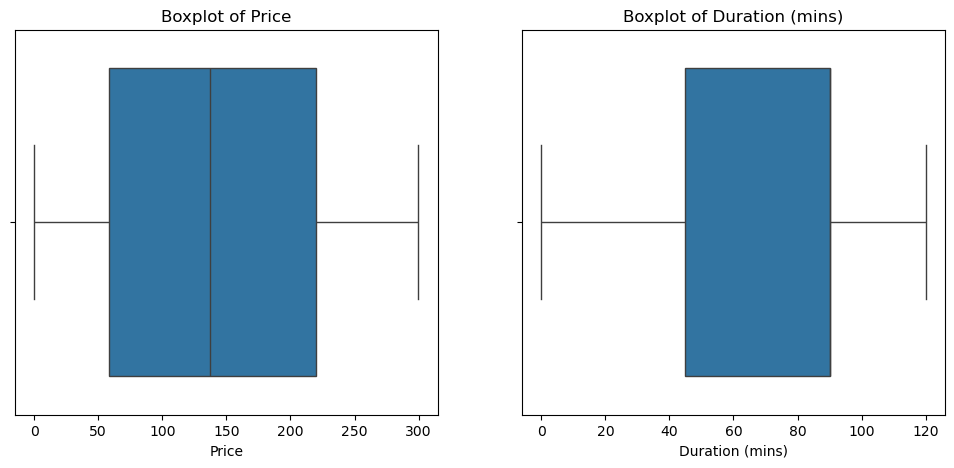

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Identify Outliers in Numeric Columns

# Plot boxplots to visualize outliers in 'Price' and 'Duration (mins)'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Duration (mins)'])
plt.title("Boxplot of Duration (mins)")

plt.show()

In [23]:
# Step 8: Detect and Handle Outliers using IQR Method

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers

    # Filter data within the acceptable range
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply outlier removal to 'Price' and 'Duration (mins)'
df_cleaned = remove_outliers(df, 'Price')
df_cleaned = remove_outliers(df_cleaned, 'Duration (mins)')

# Compare original and cleaned dataset sizes
df.shape, df_cleaned.shape

((1000, 17), (1000, 17))

In [25]:
#After applying the IQR method, the dataset size remains the same (1000 rows), meaning there are no extreme outliers that needed removal.
#This suggests that while we saw some high values, they are within an acceptable range for this dataset.

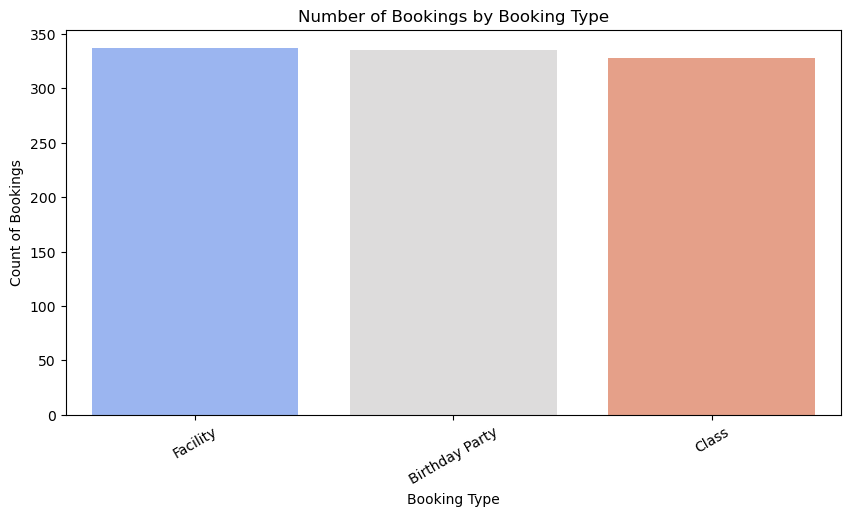

In [29]:
# Step 1: Booking Trends Analysis

# This bar chart helps identify the most frequently booked service type.
# It shows which service category (Class, Facility, Birthday Party, etc.) is in highest demand.
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x="Booking Type", order=df_cleaned["Booking Type"].value_counts().index, hue="Booking Type", palette="coolwarm", legend=False)
plt.title("Number of Bookings by Booking Type")
plt.xlabel("Booking Type")
plt.ylabel("Count of Bookings")
plt.xticks(rotation=30)
plt.show()

# Insight:
# - If one booking type dominates, it means it's the core revenue driver.
# - If some services have low bookings, they may need better marketing or pricing adjustments.


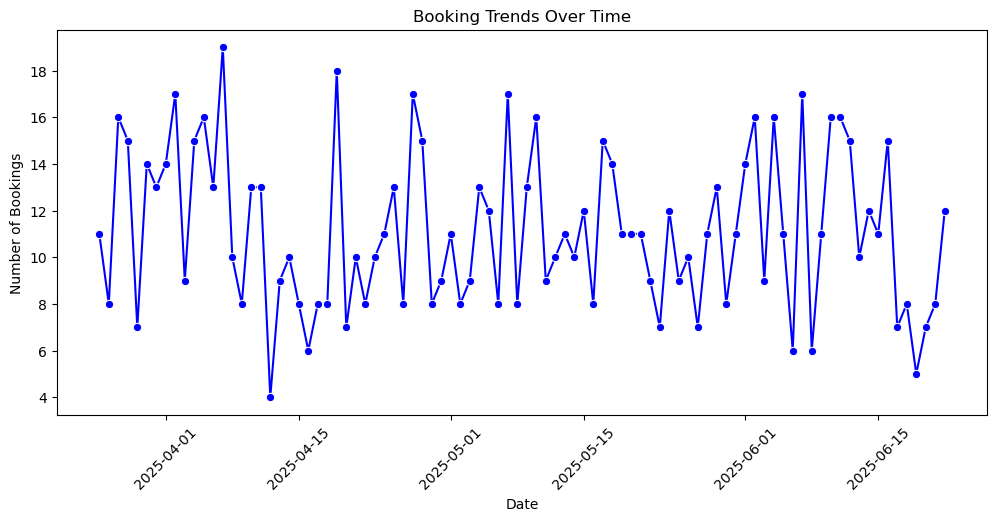

In [31]:
# This line chart shows how bookings fluctuate over time.
# It helps identify peak booking dates, seasonal trends, and low-demand periods.
plt.figure(figsize=(12, 5))
df_cleaned["Booking Date"] = pd.to_datetime(df_cleaned["Booking Date"])  # Ensure datetime format
booking_trends = df_cleaned.groupby("Booking Date").size()  # Count bookings per date
sns.lineplot(x=booking_trends.index, y=booking_trends.values, marker="o", color="b")
plt.title("Booking Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

# Insight:
# - If bookings spike on weekends/holidays → Premium pricing strategy can be applied.
# - If there are drops in bookings → Consider mid-week discounts or special promotions.


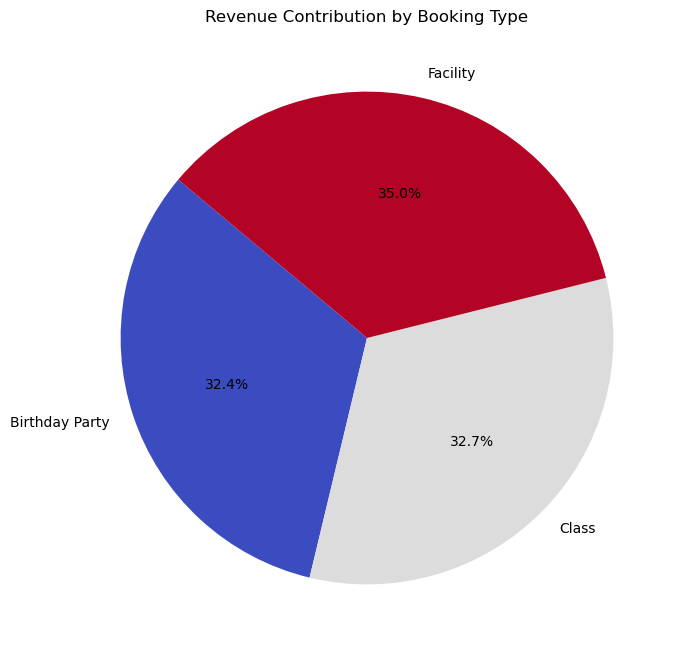

In [33]:
# Step 2: Revenue Insights

# This pie chart helps visualize the revenue contribution of each booking type.
# It shows which services generate the most income and where the business should focus.
plt.figure(figsize=(8, 8))
revenue_by_type = df_cleaned.groupby("Booking Type")["Price"].sum()  # Total revenue per type
revenue_by_type.plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=140)
plt.title("Revenue Contribution by Booking Type")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

# Insight:
# - If one booking type dominates revenue, it should be the business's primary focus.
# - Low revenue despite many bookings? Adjust pricing or upsell services.


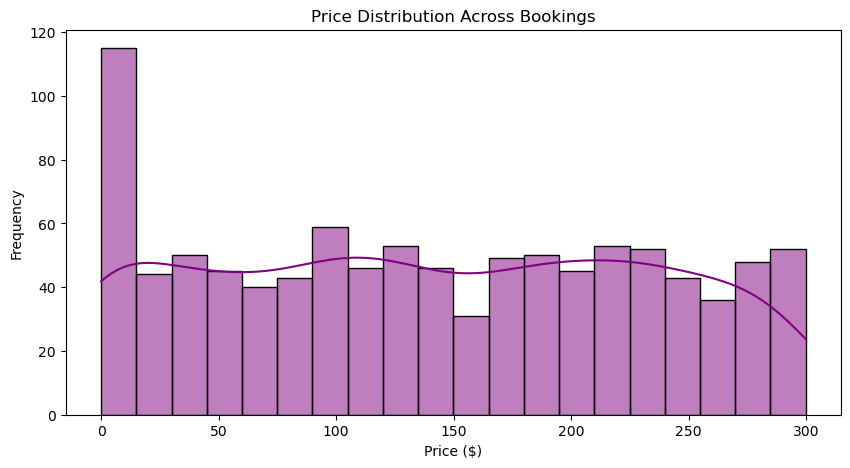

In [35]:
# Step 3: Price Distribution Analysis

# This histogram helps understand the pricing structure across bookings.
# It shows if prices follow a normal range or have extreme outliers.
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Price"], bins=20, kde=True, color="purple")
plt.title("Price Distribution Across Bookings")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Insight:
# - Multiple peaks? The business has tiered pricing (low, mid, premium).
# - Skewed prices? Some services might be overpriced or underpriced.


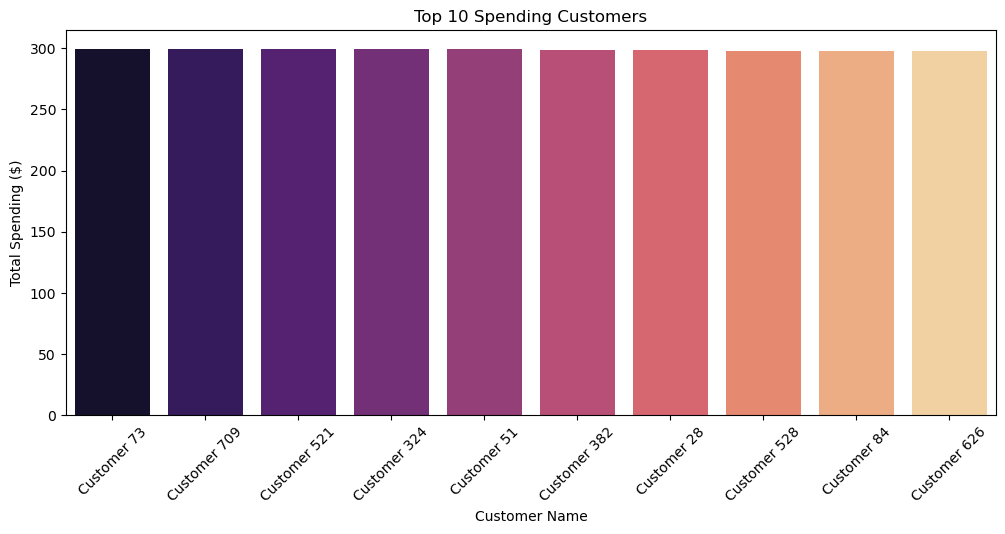

In [39]:
# Step 4: Customer Behavior Analysis

# This bar chart identifies the top 10 customers who have spent the most money.
# It helps recognize high-value customers who should be prioritized for loyalty programs.
import matplotlib.pyplot as plt
import seaborn as sns

top_spenders = df_cleaned.groupby("Customer Name")["Price"].sum().nlargest(10)  # Top 10 spenders

plt.figure(figsize=(12, 5))
sns.barplot(x=top_spenders.index, y=top_spenders.values, hue=top_spenders.index, palette="magma", legend=False)
plt.title("Top 10 Spending Customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending ($)")
plt.xticks(rotation=45)
plt.show()
# Insight:
# - These top 10 customers contribute significantly to revenue.
# - Offering them **loyalty discounts or personalized deals** can encourage repeat business.


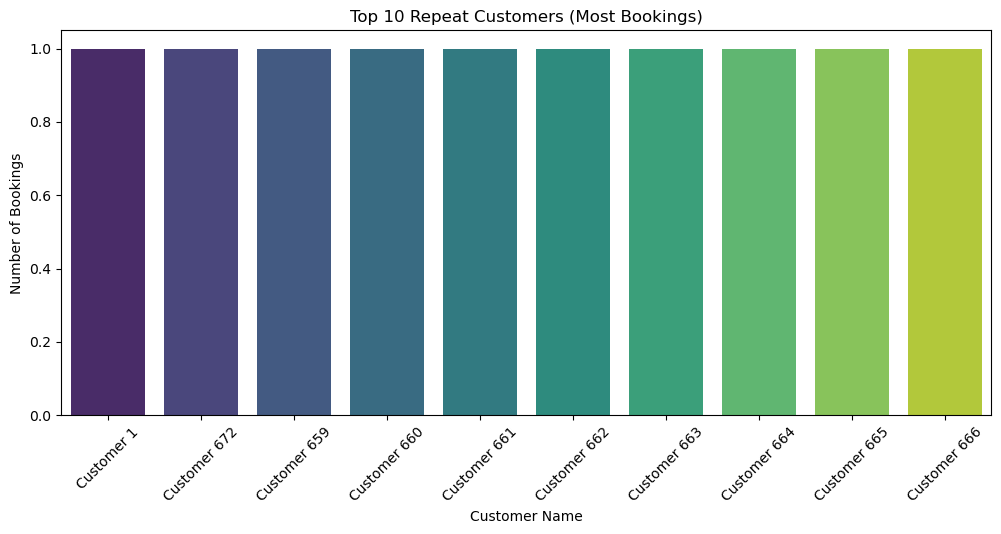

In [41]:
# Step 5: Identify Repeat Customers

import matplotlib.pyplot as plt
import seaborn as sns

# This bar chart highlights the top 10 customers with the highest number of bookings.
# These customers are the most engaged and may benefit from loyalty programs or exclusive deals.

top_repeat_customers = df_cleaned["Customer Name"].value_counts().nlargest(10)  # Top 10 most frequent bookers

plt.figure(figsize=(12, 5))
sns.barplot(x=top_repeat_customers.index, y=top_repeat_customers.values, hue=top_repeat_customers.index, palette="viridis", legend=False)
plt.title("Top 10 Repeat Customers (Most Bookings)")
plt.xlabel("Customer Name")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

# Insight:
# - These customers repeatedly use the service, making them high-value users.
# - If there’s a big gap between the top and other customers, it may indicate a small group of power users.
# - Offering them **subscription models, referral rewards, or special discounts** can increase retention.
# - If repeat customers are concentrated in one booking type, optimizing that service could further increase loyalty.


In [43]:
# Step 6: Finalize and Export Cleaned Dataset for Power BI

# Before exporting, let's ensure column names are clean and consistent
df_cleaned.columns = df_cleaned.columns.str.replace(" ", "_")  # Replace spaces with underscores

# Save the cleaned dataset as a CSV file for easy import into Power BI
cleaned_file_path = "cleaned_booking_data.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

# Confirm the file is saved
cleaned_file_path


'cleaned_booking_data.csv'